<a href="https://colab.research.google.com/github/latiscool/Ciencia_Datos/blob/main/M4/BAK_EVALUACION_M4_FINAL_LUIS_TORRS_GOMEZ_LTG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación Final Módulo 4: Inferencia EstadísticaZ
## Análisis de Nueva Metodología Educativa (GP vs MS)

**Objetivo Principal :** El Ministerio de Educación necesita determinar si la nueva metodología aplicada en el colegio Graham Parker (GP) produjo una mejora significativa en el promedio de los estudiantes en comparación con el colegio Marteen Sheen (MS).

## <a name="inicio"></a>Índice del Proyecto

1. [Identificación y Limpieza de Datos](#seccion-1)

2. [Análisis Exploratorio de Datos (EDA)](#seccion-2)

3. [Planteamiento del Problema de Inferencia](#seccion-3)

4. [Selección y Justificación del Test Estadístico](#seccion-4)

5. [Ejecución de Cálculos y Test](#seccion-5)

6. [Interpretación y Conclusiones](#seccion-6)


## <a name="seccion-1"></a>1. Identificación y Limpieza de Datos
**Objetivo:** Cargar el dataset, inspeccionar su estructura, detectar anomalías (nulos o valores fuera de rango) y preparar las variables necesarias.


In [ ]:
import pandas as pd
import numpy as np
import warnings
# Esto silencia todas las advertencias de tipo "FutureWarning"
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 1. Carga de datos
df = pd.read_csv("notas-alumnos (1).csv")

In [ ]:
#Verifincando la dimension de dataset (columnas, y filas)
df.shape

(395, 7)

In [ ]:
# 2. Revisión de estructura y nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   colegio    395 non-null    object 
 1   sexo       395 non-null    object 
 2   edad       395 non-null    int64  
 3   ausencias  395 non-null    int64  
 4   N1         395 non-null    float64
 5   N2         395 non-null    float64
 6   N3         395 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.7+ KB


In [ ]:
print("\n Conteo de Nulos (NAN)")
df.isna().sum()


 Conteo de Nulos (NAN)


,0
colegio,0
sexo,0
edad,0
ausencias,0
N1,0
N2,0
N3,0


In [ ]:
#3. Estadistica descriptiva, revision de rangos.
df.describe()

,edad,ausencias,N1,N2,N3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,3.824810,3.760506,3.654430
std,1.276043,8.003096,1.164139,1.312304,1.601205
min,15.000000,0.000000,1.000000,0.000000,0.000000
25%,16.000000,0.000000,2.800000,3.200000,2.800000
50%,17.000000,4.000000,3.900000,3.900000,3.900000
75%,18.000000,8.000000,4.600000,4.600000,4.900000
max,22.000000,75.000000,6.600000,6.600000,7.000000


### Analisis

- Se detecta en df.describe() que muestra en el mínimo en N2 y N3 es 0.0.<br>
En Chile, la nota mínima es 1.0. Un 0.0 generalmente es un error de digitación o un "alumno ausente" (dato faltante).


### Tratamiento y Limpieza de datos.
Pasos:<br>
 - a) Reemplazar los 0.0 por NaN, para que no afecten el promedio (y para que se pueda usar dropna()). <br>
 -  b) Eliminar las filas que ahora solo tiene NaN.

In [ ]:
# Paso A: Reemplazar 0 por NaN
df[["N1", "N2", "N3"]]= df[["N1", "N2", "N3"]].replace(0, np.nan)
# Paso B: Eliminar filas que ahora tienen NaN (limpieza estricta)
#Creando un df limpio, ademas evito la advertencias. Ademas creando un checkpoint.
df_limpio = df.dropna().copy()

print(f"Dimennsion del df_limpio despues de la limpieza {df_limpio.shape}")

Dimennsion del df_limpio despues de la limpieza (357, 7)


In [ ]:
#Verficando no mas 0.0 y NaN
df_limpio.describe()

,edad,ausencias,N1,N2,N3
count,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,6.316527,3.952101,3.986275,4.043417
std,1.268262,8.187623,1.134929,1.094910,1.122619
min,15.000000,0.000000,1.000000,1.800000,1.400000
25%,16.000000,2.000000,3.200000,3.200000,3.200000
50%,17.000000,4.000000,3.900000,3.900000,3.900000
75%,18.000000,8.000000,4.900000,4.900000,4.900000
max,22.000000,75.000000,6.600000,6.600000,7.000000


In [ ]:
df_limpio.sample(5)


,colegio,sexo,edad,ausencias,N1,N2,N3
87,GP,F,15,4,4.6,4.9,4.9
45,GP,F,15,8,2.8,2.8,2.1
353,MS,M,19,4,2.8,2.8,2.8
294,GP,M,18,8,4.9,4.6,4.9
167,GP,F,16,0,4.9,5.2,5.6


### Calculando Promedios de N1, N2 y N3
> asegurarse que este el parametro axis=1 , para que el promedio por filas (no por columna)


In [ ]:
df_limpio["Promedio"]=df[["N1","N2","N3"]].mean(axis=1)
df_limpio.head()

,colegio,sexo,edad,ausencias,N1,N2,N3,Promedio
0,GP,F,18,6,1.8,2.1,2.1,2.000000
1,GP,F,17,4,1.8,1.8,2.1,1.900000
2,GP,F,15,10,2.4,2.8,3.5,2.900000
3,GP,F,15,2,5.2,4.9,5.2,5.100000
4,GP,F,16,4,2.1,3.5,3.5,3.033333


---

## <a name="seccion-2"></a>2. Análisis Exploratorio de Datos (EDA)
**Objetivo:** Caracterizar las notas de ambos colegios visualmente. Para detectar alguna diferencia a simple vista (Histogramas y Boxplots).

[↑ Volver al inicio](#inicio)

---

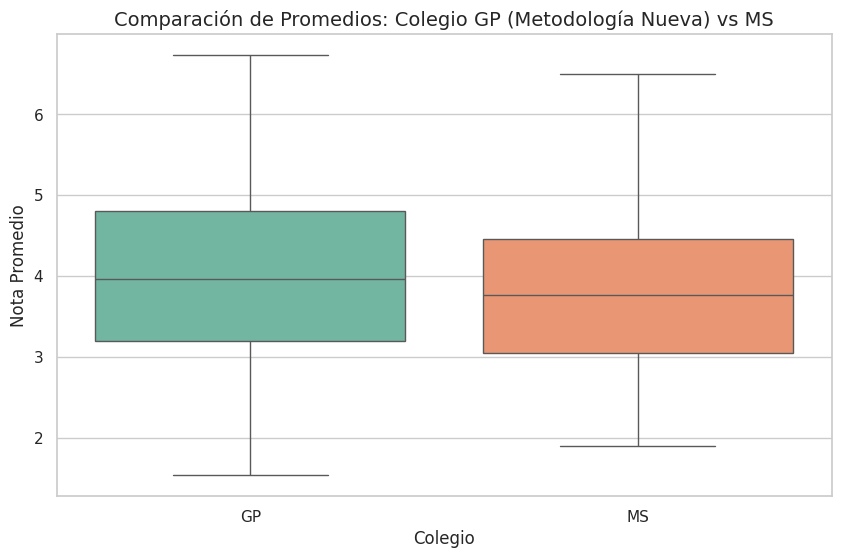

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Configuracion del grafico
plt.figure(figsize=(10, 6)) # (Ancho, Alto)
sns.set_theme(style="whitegrid")

#Boxplot con df_limpio
sns.boxplot(data=df_limpio, x='colegio', y='Promedio', palette='Set2')

plt.title('Comparación de Promedios: Colegio GP (Metodología Nueva) vs MS', fontsize=14)
plt.ylabel('Nota Promedio')
plt.xlabel('Colegio')
plt.show()




###  Analisis
* **Mucho Solapamiento :** Como las cajas comparten gran parte del mismo rango vertical (ambas tienen alumnos con 3.0, 4.0, 5.0), significa que las poblaciones son muy parecidas.

**Conclusión:**


#### ***Como hay mucho solapamiento, la diferencia visual "no convence". Por eso es OBLIGATORIO usar un Test Estadístico para ver si esa pequeña ventaja de GP es real o no. Pero antes veamos un Histograma con KDE ***

#### Histograma con curva de densidad (KDE)
- Nos ayuda a intuir si los datos tienen forma distribución normal o si están cargados a un lado.
- Ademas podemos ver exactamente en qué notas se cruzan los colegios GP y MS.

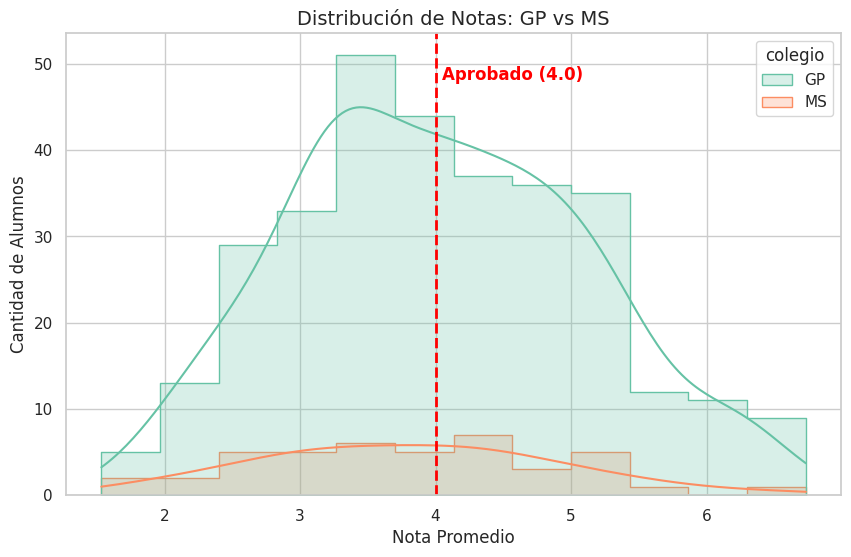

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 1. El Histograma
# Guardamos el gráfico en 'ax' para obtener los límites después
ax = sns.histplot(data=df_limpio, x='Promedio', hue='colegio', kde=True, palette="Set2", element="step")

# 2. La Línea de Referencia
plt.axvline(x=4.0, color='red', linestyle='--', linewidth=2)

# 3. Etiqueta directa de "Aprobado 4.0"
# Usamos las coordenadas relativas del gráfico para poner el texto siempre arriba
plt.text(x=4.05, y=ax.get_ylim()[1]*0.9, s='Aprobado (4.0)', color='red', fontweight='bold')

plt.title('Distribución de Notas: GP vs MS', fontsize=14)
plt.xlabel('Nota Promedio')
plt.ylabel('Cantidad de Alumnos')

plt.show()

### Analisis
Algo se aprecia en ambos grafico es el **Desbalance de Clases**. En un histograma de frecuencia (conteo), la altura depende de la cantidad de alumnos.

Al tener muestras tan desequilibradas (GP tiene ~300 y MS ~40) hace que los tests sean más sensibles.
No invalida el análisis, PERO nos obliga a ser estrictos con la **Homocedasticidad** (igualdad de varianzas).

### **Conclusión Visual:**
Lo que nos importa para la "Normalidad" no es la altura, sino la **silueta**.
* Si la silueta de GP está "cargada a la derecha", probablemente **NO sea Normal**.

***Validamos la "normalidad" para saber si podemos usar el test fino (T-Student) o si debemos usar el test todo terreno (Mann-Whitney). En este caso seria Mann-Whitney***

---



## <a name="seccion-3"></a>3. Planteamiento del Problema de Inferencia
**Objetivo:** Definir formalmente las Hipótesis Nula ($H_0$) y Alternativa ($H_1$) que validaremos.

[↑ Volver al inicio](#inicio)

---



### Hipótesis
Dado que el Ministerio de Educación busca determinar si la nueva metodología produjo una **"mejora significativa"**, definimos un test direccional (Unilateral a la derecha).

* **Variables:**
    * $\mu_{GP}$: Promedio de notas del colegio Graham Parker.
    * $\mu_{MS}$: Promedio de notas del colegio Marteen Sheen.

**Hipótesis Nula ($H_0$):**
La nueva metodología **no generó mejora**. El promedio de GP es igual o inferior al de MS.
$$H_0: \mu_{GP} \leq \mu_{MS}$$

**Hipótesis Alternativa ($H_1$):**
La nueva metodología **sí produjo una mejora**. El promedio de GP es mayor al de MS.
$$H_1: \mu_{GP} > \mu_{MS}$$

Nivel de significancia ( α ): 0.05 (5%).

Intervalo de Confinaza (95%)

## <a name="seccion-4"></a>4. Selección y Justificación del Test Estadístico
**Objetivo:** Verificar los supuestos estadísticos de Normalidad y Homocedasticidad para determinar si corresponde aplicar un test Paramétrico (T-Student) o No Paramétrico (Mann-Whitney).

[↑ Volver al inicio](#inicio)

---

### A REALIZAR:

- Test Paramétrico (T-Student): Es el más potente, pero exige que los datos sean "Normales" (forma de campana) y tengan varianzas similares.
- Test No Paramétrico (Mann-Whitney U): Se usa cuando los datos no cumplen las reglas anteriores.


Para tomar esta decisión, someteremos los datos a dos pruebas:

- Test de Shapiro-Wilk: ¿Los datos se distribuyen normalmente?
- Test de Levene: ¿Las varianzas (dispersión) de ambos grupos son iguales?


### Test Shapiro-Wilk & Test Levene

In [ ]:
from scipy import stats

# 1. Preparamos los datos limpios.
'''
Lógica: Los tests estadísticos necesitan comparar dos listas de números separadas.
Traducción: "Busca en df_limpio todas las filas donde el colegio sea 'GP', y de esas filas, dame solo la columna 'Promedio'".
'''
gp_notas = df_limpio[df_limpio["colegio"] == "GP"]["Promedio"]
ms_notas = df_limpio[df_limpio["colegio"] == "MS"]["Promedio"]



### **Desglose Anatómico**



```
stat_gp, p_gp = stats.shapiro(gp_notas)
```
Imagina que esa línea es una ecuación con tres partes: Izquierda, Centro y Derecha.

1. La Derecha: El "Envío" (stats.shapiro(gp_notas))

stats: Es la librería (la caja de herramientas) que importamos de scipy.

.shapiro(...): Es la herramienta específica que sacamos de la caja. Es una función matemática que dice: "Dame una lista de números y yo calcularé qué tan 'Normales' son".

(gp_notas): Es la materia prima. Le entregamos la lista de promedios del colegio GP.

2. El Centro: El "Paquete" (El Retorno)
Aquí está el truco. Cuando la función shapiro termina de calcular, no devuelve un solo número. **Devuelve un "paquete" (una tupla) con dos regalos adentro:**

- El Estadístico W (un valor técnico de la forma de la curva).

- El P-Value (la probabilidad de que sea normal).

Es como si la función te diera una caja con dos zapatos.

3. La Izquierda: El "Desempaquetado" (stat_gp, p_gp)

Aquí es donde ocurre la magia de Python.

- Si escribieras solo resultado = stats.shapiro(...), la variable resultado tendría los dos números juntos (0.98, 0.012).

- Pero al poner variable1, variable2 = ..., le estás diciendo a Python:

"Abre la caja. Toma el primer número y guárdalo en stat_gp. Toma el segundo número y guárdalo en p_gp."

¿Qué significa cada variable?
1. stat_gp (El dato "nerd"):

- Es el "Estadístico W" de Shapiro-Wilk.

- ¿Para qué sirve? Honestamente, en el día a día casi no lo miramos. Es el resultado crudo de la fórmula matemática.

- Por eso a veces verás gente que pone _ en su lugar, porque no les interesa.

2. p_gp (El dato "jefe"):

- Es el **P-Value**.

¿Para qué sirve? Es el que toma la decisión.

- **Si es < 0.05: ¡Alerta! No es normal.**

- **Si es > 0.05: Todo tranquilo, es normal.**

In [ ]:
print("=== PASO 1: Verificación de Normalidad (Test de Shapiro-Wilk) ===")
# Hipótesis Nula (H0): Los datos SON normales.
# Si p-value < 0.05, rechazamos H0 (NO son normales).

stat_gp, p_gp = stats.shapiro(gp_notas)
stat_ms, p_ms = stats.shapiro(ms_notas)

print(f"Colegio GP (Metodología Nueva): p-value = {p_gp:.4f} -> {'Normal' if p_gp > 0.05 else 'NO Normal'}")
print(f"Colegio MS (Control):           p-value = {p_ms:.4f} -> {'Normal' if p_ms > 0.05 else 'NO Normal'}")




=== PASO 1: Verificación de Normalidad (Test de Shapiro-Wilk) ===
Colegio GP (Metodología Nueva): p-value = 0.0123 -> NO Norma
Colegio MS (Control):           p-value = 0.8119 -> Normal


In [ ]:
print("\n=== PASO 2: Verificación de Homocedasticidad (Test de Levene) ===")
# Hipótesis Nula (H0): Las varianzas son IGUALES.
# Si p-value < 0.05, rechazamos H0 (Son distintas).
stat_levene, p_levene = stats.levene(gp_notas, ms_notas)

print(f"Comparación de Varianzas:       p-value = {p_levene:.4f}")
if p_levene > 0.05:
    print("Resultado: Varianzas IGUALES (Homocedasticidad cumple).")
else:
    print("Resultado: Varianzas DISTINTAS (Homocedasticidad falla).")


=== PASO 2: Verificación de Homocedasticidad (Test de Levene) ===
Comparación de Varianzas:       p-value = 0.7972
Resultado: Varianzas IGUALES (Homocedasticidad cumple).


### **Justificación y Elección del Test**

Analizando los resultados obtenidos:

1.  **Normalidad:** El grupo del colegio GP obtuvo un $p\text{-value} = 0.012$ (menor a 0.05). Esto significa que **no cumple** con el supuesto de normalidad.
2.  **Homocedasticidad:** El test de Levene dio un $p\text{-value} = 0.79$ (mayor a 0.05), indicando que las varianzas son iguales.

**Conclusión:**
- Aunque las varianzas son iguales, el incumplimiento de la **Normalidad** en el grupo principal (GP) invalida el uso confiable de la prueba paramétrica **T-Student**.

**Decisión Final:**
Se procederá a utilizar el **Test U de Mann-Whitney**.

- **Motivo:** Es la alternativa no paramétrica diseñada para comparar si una población tiende a tener valores mayores que otra cuando no podemos asumir una distribución normal.

### Resumen de  Supuestos


| Test      | ¿Qué mide?         | H0​ (Lo ideal)       | Tu Resultado (p-value) | ¿Pasó la prueba? |
|------------|--------------------|----------------------|------------------------|------------------|
| Shapiro    | Forma (Normalidad) | "Es Normal"          | 0.012 (< 0.05)         | ❌ Reprobado (Por eso nos fuimos a Mann-Whitney) |
| Levene     | Ancho (Varianza)   | "Son Iguales"        | 0.790 (> 0.05)         | ✅ Aprobado (Aunque ya no sirva de mucho porque falló Shapiro) |


### UNIVERSO PARALEO si SHAPIRO > 0.05 = NORMAL


---

###. ¿Habría cambiado el resultado final? (El Poder Estadístico)

Aquí está la clave: el **Test T-Student** tiene más *poder estadístico*.  
¿Qué significa? Es más “biónico” para detectar diferencias pequeñas.  

**El escenario:**
- Tu **Mann-Whitney** dio `p = 0.12` (no detectó mejora).  
- Es posible (aunque no seguro) que un **T-Student**, al ser más sensible, hubiera bajado ese número a `0.08` o incluso `0.04`.

---

### 4. Resumen del Árbol de Decisión

Para que nunca se te olvide, este es el mapa mental que sigue un Data Scientist:

| Pregunta | Condición | Resultado | Test a usar |
|-----------|------------|------------|--------------|
| **1. Shapiro** | ¿Es Normal? | ❌ NO | **Mann-Whitney** *(Tu caso actual)* |
|  |  | ✅ SÍ | Pasamos a la pregunta 2 |
| **2. Levene** | ¿Varianzas Iguales? | ✅ SÍ | **T-Student Estándar** *(Escenario ideal)* |
|  |  | ❌ NO | **T-Student de Welch** *(Versión ajustada)* |

---

### En Conclusión

Si **Shapiro** hubiera aprobado, habrías usado un test matemático más clásico y potente (**T-Student**).  
Pero como falló, hiciste lo correcto al ser prudente y usar **Mann-Whitney**.


## <a name="seccion-5"></a>5. Ejecución de Cálculos y Test
**Objetivo:** Ejecutar el test estadístico seleccionado (Mann-Whitney U) para obtener el estadístico de prueba y el *p-value* que validará o rechazará la hipótesis.

[↑ Volver al inicio](#inicio)

---


In [ ]:
from scipy.stats import mannwhitneyu

# 1. Ejecución del Test U de Mann-Whitney
# Configuración: alternative='greater'
# Razón: Nuestra Hipótesis H1 busca si GP es "MAYOR" que MS.
u_statistic, p_value = mannwhitneyu(gp_notas, ms_notas, alternative='greater')

print("=== Resultados del Test de Mann-Whitney U ===")
print(f"Estadístico U: {u_statistic}")
print(f"P-value final: {p_value:.4f}")

# 2. Regla de Decisión Automática (Alpha = 0.05)
alpha = 0.05
print("\n=== Decisión Estadística ===")

if p_value < alpha:
    print(f"Resultado: {p_value:.4f} < {alpha}")
    print("CONCLUSIÓN: RECHAZAMOS la Hipótesis Nula (H0).")
    print("Interpretación: Existe evidencia estadística suficiente para afirmar que la metodología nueva MEJORÓ el promedio.")
else:
    print(f"Resultado: {p_value:.4f} > {alpha}")
    print("CONCLUSIÓN: NO RECHAZAMOS la Hipótesis Nula (H0).")
    print("Interpretación: NO existe evidencia estadística suficiente para afirmar una mejora. La diferencia observada puede deberse al azar.")

=== Resultados del Test de Mann-Whitney U ===
Estadístico U: 7327.0
P-value final: 0.1287

=== Decisión Estadística ===
Resultado: 0.1287 > 0.05
CONCLUSIÓN: NO RECHAZAMOS la Hipótesis Nula (H0).
Interpretación: NO existe evidencia estadística suficiente para afirmar una mejora. La diferencia observada puede deberse al azar.


## <a name="seccion-6"></a>6. Interpretación y Conclusiones
**Objetivo:** Interpretar el *p-value* en el contexto del problema y traducir el hallazgo estadístico en una recomendación estratégica clara para el Ministerio.

[↑ Volver al inicio](#inicio)

---

#### **Resumen**

Hemos analizado los resultados de la nueva metodología educativa aplicada en el colegio Graham Parker (GP) comparándola con el método tradicional del colegio Marteen Sheen (MS).

Si miramos solo los promedios simples, los alumnos de GP obtuvieron una nota media de **4.0**, ligeramente superior al **3.8** de MS. A primera vista, parece ser mejor.

**Sin embargo, estadísticamente nos relfeja un resultado diferente:**
Al someter estos datos a una prueba rigurosa (Mann-Whitney U), el resultado indica que **esta diferencia NO es estadísticamente significativa**.

#### **Conclusión**
* **Hipótesis:** No se pudo rechazar la Hipótesis Nula ($H_0$) con un nivel de confianza del 95%.
* **Evidencia:** El *p-value* obtenido fue de **0.1287**, lo cual es superior al umbral de riesgo permitido (0.05).
* **Dictamen:** No existe evidencia científica suficiente para afirmar que la nueva metodología mejore el rendimiento académico general.

#### **Recomendaciones al Ministerio**
Dado este resultado "no concluyente", sugerimos:

1.  **No masificar la metodología aún:** Sería irresponsable invertir recursos a nivel nacional sin pruebas más contundentes.
2.  **El problema del Desbalance:** El estudio comparó **315 alumnos de GP** contra solo **45 de MS**. Esta desigualdad de condiciones dificulta detectar mejoras sutiles.
3.  **Siguiente Paso:** Repetir el experimento el próximo semestre equilibrando las muestras (ej. tomar 50 alumnos de cada colegio al azar) para reducir el "ruido" estadístico y obtener una conclusión definitiva.

# ANEXO

###**E. El Efecto del Tamaño de Muestra (N)**

**Observación:**
Ves que la curva de MS es "más baja" y esto preocupa que eso afecte la comparación.

**La Realidad Estadística:**
1.  **Altura vs. Forma:** En un histograma de frecuencia (conteo), la altura depende de la cantidad de alumnos. Como GP tiene ~300 y MS ~40, es obvio que GP se verá gigante.
2.  **¿Afecta al Test?**
    * **La mala noticia:** Tener muestras tan desequilibradas (300 vs 40) hace que los tests sean más sensibles.
    * **La buena noticia:** No invalida el análisis, PERO nos obliga a ser estrictos con la **Homocedasticidad** (igualdad de varianzas).

**Conclusión Visual:**
Lo que nos importa para la "Normalidad" no es la altura, sino la **silueta**.
* Si la silueta de GP está "cargada a la derecha" (como notaste), probablemente **NO sea Normal**.